In [1]:
import pandas as pd

In [2]:
# pivot_table
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 출력옵션
data = [['김판다', '남', 'A', 97, '1등', '수시'], 
        ['강승주', '여', 'A', 88, '2등', '정시'], 
        ['권보아', '여', 'A', 78, '3등', '정시'], 
        ['이예준', '여', 'B', 64, '3등', '수시'], 
        ['박효신', '남', 'B', 84, '2등', '수시'], 
        ['송중기', '남', 'B', 89, '1등', '수시'], 
        ['김나현', '여', 'C', 87, '3등', '정시'], 
        ['장범준', '남', 'C', 92, '2등', '정시'], 
        ['안지영', '여', 'C', 99, '1등', '수시']]
col1 = ['이름', '성별', '반', '점수', '반등수', '비고']
df = pd.DataFrame(data, columns=col1)
df

,이름,성별,반,점수,반등수,비고
0,김판다,남,A,97,1등,수시
1,강승주,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,이예준,여,B,64,3등,수시
4,박효신,남,B,84,2등,수시
5,송중기,남,B,89,1등,수시
6,김나현,여,C,87,3등,정시
7,장범준,남,C,92,2등,정시
8,안지영,여,C,99,1등,수시


In [3]:
# 반과 성별로 나누어 점수의 평균 구하기
df.pivot_table('점수', index='반', columns='성별', aggfunc='mean')

성별,남,여
반,,
A,97.00,83.00
B,86.50,64.00
C,92.00,93.00


In [4]:
# aggfunc default는 mean
df.pivot_table('점수', index='반', columns='성별')

성별,남,여
반,,
A,97.00,83.00
B,86.50,64.00
C,92.00,93.00


In [5]:
# 반과 남녀/비고로 나눠서 평균점수 구하기
df.pivot_table('점수', index=['반', '성별'], columns='비고')

비고      수시    정시
반 성별            
A 남  97.00   NaN
  여    NaN 83.00
B 남  86.50   NaN
  여  64.00   NaN
C 남    NaN 92.00
  여  99.00 87.00

In [6]:
# 반/성별과 비고로 나눠서 인원수 구하기
df.pivot_table('점수', index='반', columns=['성별', '비고'], aggfunc='count')

성별    남         여     
비고   수시   정시   수시   정시
반                     
A  1.00  NaN  NaN 2.00
B  2.00  NaN 1.00  NaN
C   NaN 1.00 1.00 1.00

In [7]:
# 반과 성별로 나누어 평균점수와 인원수 구하기
df.pivot_table('점수', index='반', columns='성별', aggfunc=['mean', 'count'])

mean       count   
성별     남     여     남  여
반                      
A  97.00 83.00     1  2
B  86.50 64.00     2  1
C  92.00 93.00     1  2

In [8]:
# pivot 함수는 집계함수가 필요 없으므로 문자열을 피벗팅하기에 편리
df.pivot(values='이름', index='반', columns='반등수')

반등수,1등,2등,3등
반,,,
A,김판다,강승주,권보아
B,송중기,박효신,이예준
C,안지영,장범준,김나현


### 타이타닉 프로젝트

In [9]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.1f}'.format # 소수점 출력옵션
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.8,NaN,Q


In [10]:
# 필요한 열만 가져오기
df_ex1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df_ex2 = df_ex1.iloc[:, [1,2,4,5,9]].copy()
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
...,...,...,...,...,...
888,0,3,female,NaN,23.4
889,1,1,male,26.0,30.0
890,0,3,male,32.0,7.8


In [12]:
# age에 null값이 있다.
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [13]:
df_ex2['Age'].isnull()

0      False
1      False
2      False
       ...  
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
df_ex2[~df_ex2['Age'].isnull()]

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
...,...,...,...,...,...
887,1,1,female,19.0,30.0
889,1,1,male,26.0,30.0
890,0,3,male,32.0,7.8


In [15]:
# dropna 사용 : nan이 있는 열이나 행을 삭제
df_ex2 = df_ex2.dropna()
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB


In [16]:
# 선실등급 / 성별로 인원수 피벗테이블로 만들기
df_ex2.pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,85,101
2,74,99
3,102,253


<Axes: xlabel='Pclass'>

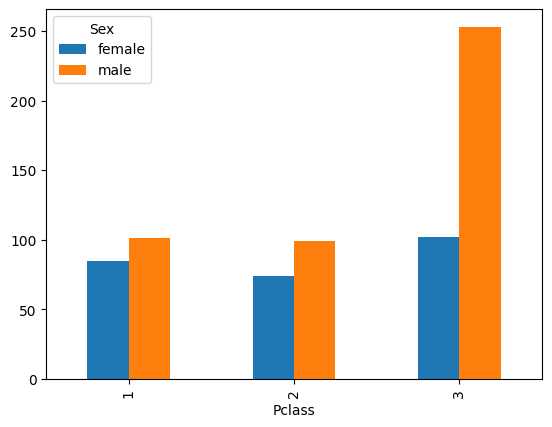

In [17]:
df_ex2.pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count').plot(kind='bar')

In [18]:
# 선실등급 / 성별로 평균나이 피벗테이블로 만들기
df_ex2.pivot_table('Age', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,34.6,41.3
2,28.7,30.7
3,21.8,26.5


<Axes: xlabel='Pclass'>

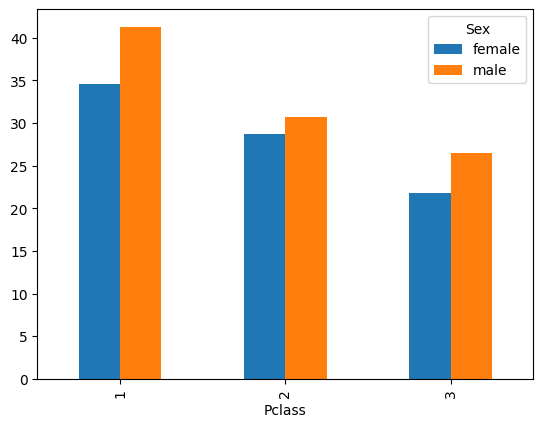

In [19]:
df_ex2.pivot_table('Age', index='Pclass', columns='Sex').plot(kind='bar')

In [20]:
# 선실등급 / 성별로 평균운임 피벗테이블로 만들기
df_ex2.pivot_table('Fare', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,107.9,71.1
2,22.0,21.1
3,15.9,12.2


<Axes: xlabel='Pclass'>

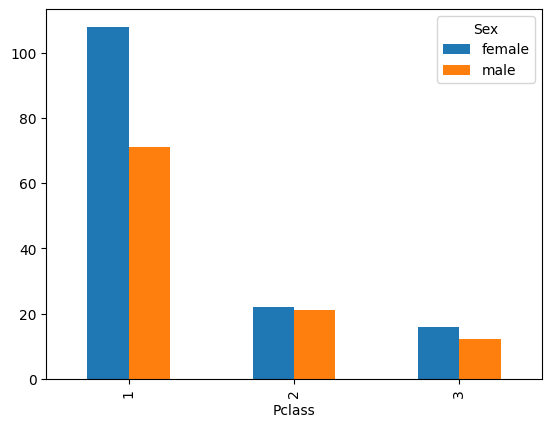

In [21]:
df_ex2.pivot_table('Fare', index='Pclass', columns='Sex').plot(kind='bar')

In [22]:
# 선실등급 / 성별로 생존률 피벗테이블 만들기
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,1.0,0.4
2,0.9,0.2
3,0.5,0.2


<Axes: xlabel='Pclass'>

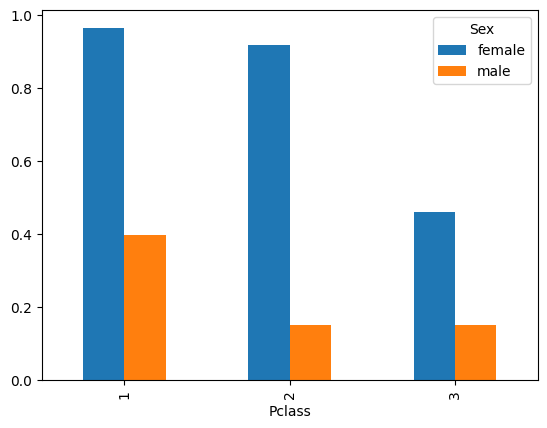

In [23]:
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex').plot(kind='bar')

In [24]:
# seaborn으로 시각화하기
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='count'>

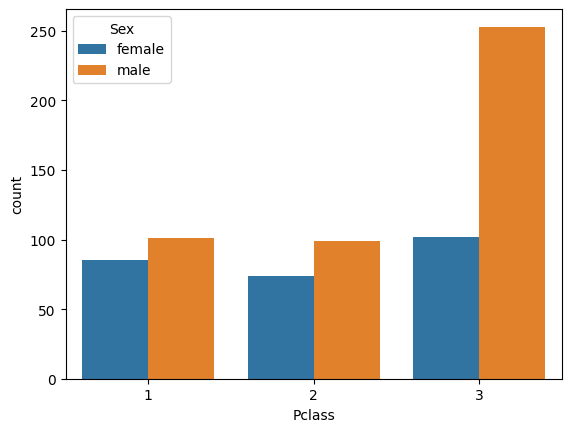

In [25]:
# countplot
sns.countplot(data=df_ex2, x='Pclass', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

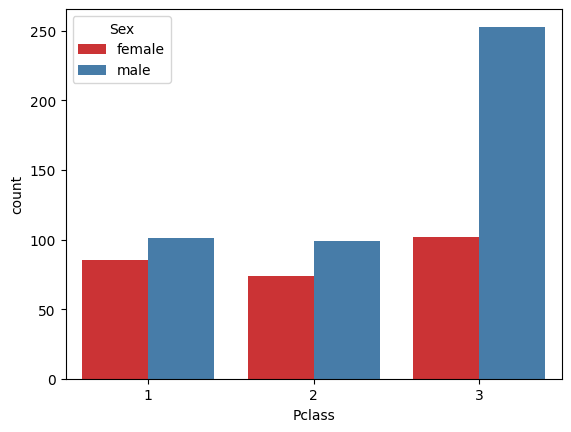

In [26]:
# 색상 지정
sns.countplot(data=df_ex2, x='Pclass', hue='Sex', palette='Set1')

<Axes: xlabel='Pclass'>

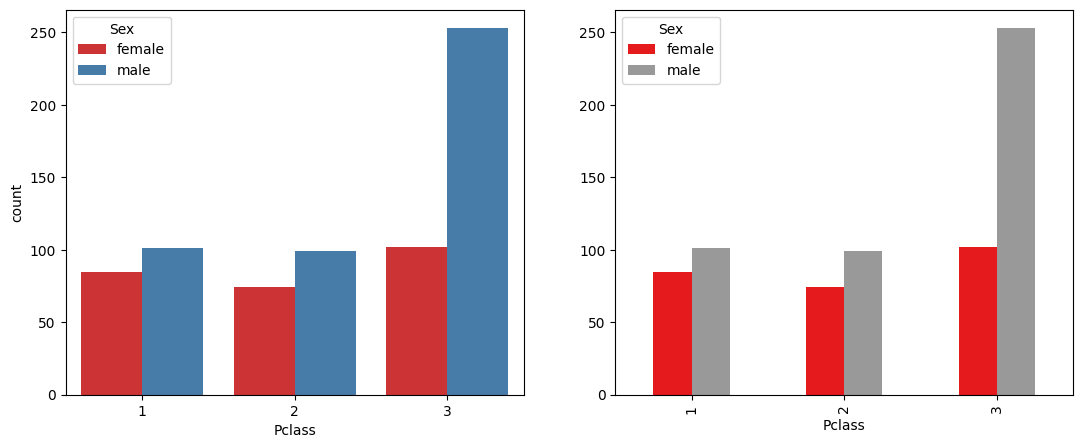

In [27]:
# 판다스 plot 함수와 seaborn의 비교
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(13, 5)) # ncols 그림 여러개 비교
sns.countplot(data=df_ex2, x='Pclass', hue='Sex', palette='Set1', ax=ax[0])

(df_ex2
    .pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')
    .plot(kind='bar', ax=ax[1], colormap='Set1'))

<Axes: xlabel='Pclass', ylabel='Age'>

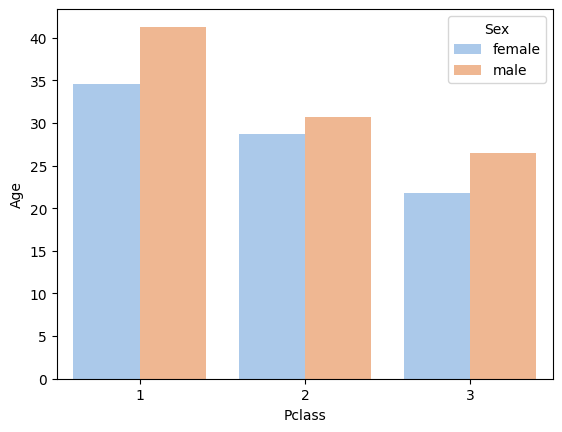

In [28]:
# barplot
sns.barplot(data=df_ex2, x='Pclass', y='Age', hue='Sex', errorbar=('ci', False), palette='pastel') # ci 오차막대

<Axes: xlabel='Pclass', ylabel='Fare'>

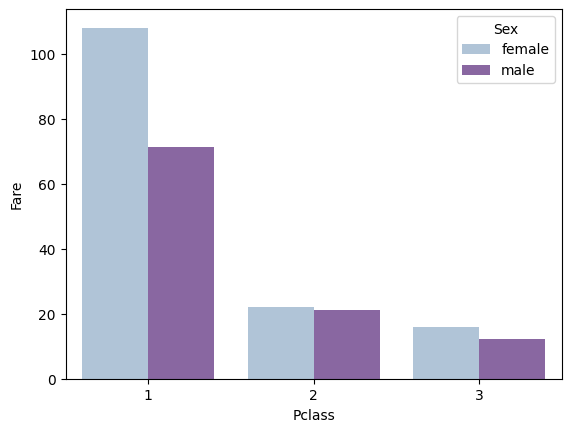

In [29]:
# barplot, 평균 운임
sns.barplot(data=df_ex2, x='Pclass', y='Fare', hue='Sex', errorbar=('ci', False), 
            palette='BuPu') # ci 오차막대

<Axes: xlabel='Pclass', ylabel='Fare'>

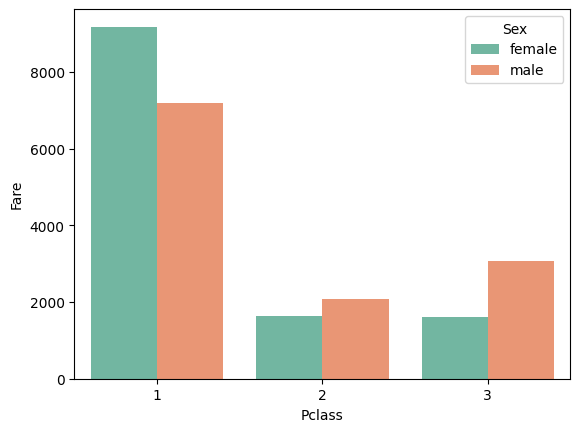

In [30]:
# barplot, 총 운임
sns.barplot(data=df_ex2, x='Pclass', y='Fare', hue='Sex', errorbar=('ci', False),
            palette='Set2', estimator=sum) # ci 오차막대

<Axes: xlabel='Pclass', ylabel='Survived'>

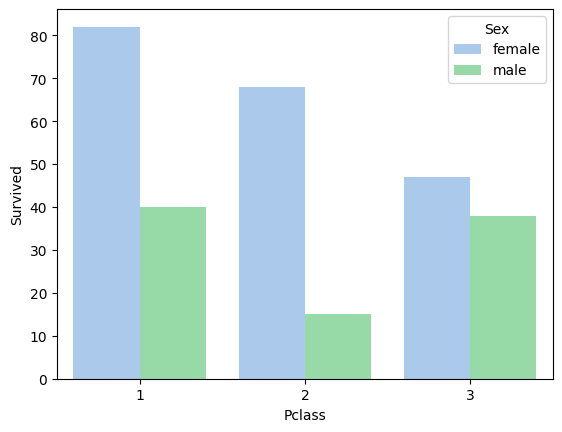

In [31]:
# barplot, 평균 생존
sns.barplot(data=df_ex2, x='Pclass', y='Survived', hue='Sex', errorbar=('ci', False),
            palette='pastel6', estimator=sum) # ci 오차막대

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Survival rate')]

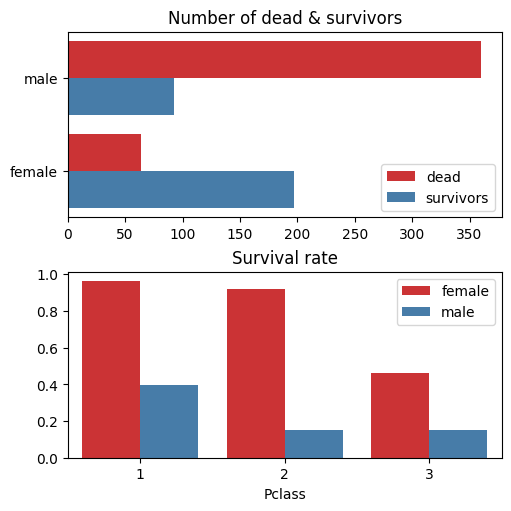

In [32]:
# 최종 그래프
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(5, 5), constrained_layout=True)

sns.countplot(y='Sex', data=df_ex2, hue='Survived', palette='Set1', ax=ax[0])
ax[0].legend(title='', loc='best', labels=['dead', 'survivors'])
ax[0].set(xlabel='', ylabel='', title='Number of dead & survivors')


sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_ex2, palette='Set1', ax=ax[1], errorbar=('ci', False))
ax[1].legend(title='', loc='upper right')
ax[1].set(ylabel='',title='Survival rate')

In [33]:
# 맞춤형 피벗테이블 만들기
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
...,...,...,...,...,...
887,1,1,female,19.0,30.0
889,1,1,male,26.0,30.0
890,0,3,male,32.0,7.8


<Axes: xlabel='Age', ylabel='Count'>

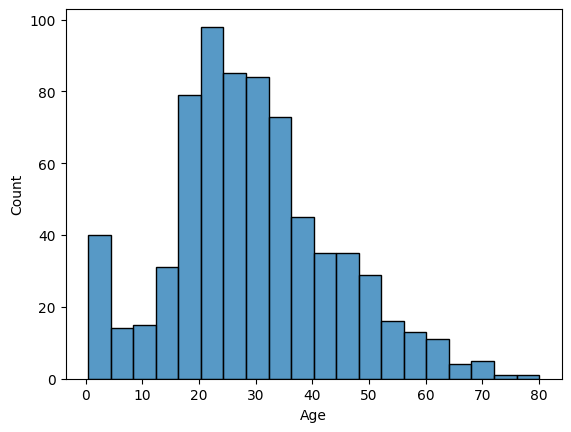

In [34]:
# 나이 분포 확인
sns.histplot(df_ex2['Age'])

In [35]:
# 15세 이하의 생존률 구하기 : 생존률 구하는 것에서 필터링하면 됨.
cond1 = df_ex2['Age'] <= 15
df_ex2[cond1].pivot_table('Survived', index='Pclass')

,Survived
Pclass,
1,0.8
2,1.0
3,0.4


In [36]:
# 15세 초과의 생존률 구하기
df_ex2[~cond1].pivot_table('Survived', index='Pclass')

,Survived
Pclass,
1,0.7
2,0.4
3,0.2


In [37]:
df_ex3 = df_ex2.copy()
df_ex3['A or C'] = df_ex3['Age'].mask(cond1, 'child').mask(~cond1, 'adult')
df_ex3

,Survived,Pclass,Sex,Age,Fare,A or C
0,0,3,male,22.0,7.2,adult
1,1,1,female,38.0,71.3,adult
2,1,3,female,26.0,7.9,adult
...,...,...,...,...,...,...
887,1,1,female,19.0,30.0,adult
889,1,1,male,26.0,30.0,adult
890,0,3,male,32.0,7.8,adult


In [38]:
df_ex3.pivot_table('Survived', index='Pclass', columns='A or C')

A or C,adult,child
Pclass,,
1,0.7,0.8
2,0.4,1.0
3,0.2,0.4


In [39]:
# seaborn 및 pivot_table에 lambda 함수 적용하기
# idxmax 함수의 필요성을 위한 예제 df
df = pd.DataFrame([[22, '김판다'], [17, '강승주'], [18, '송중기']], 
                  columns=['Age', 'Name'])

In [40]:
df

,Age,Name
0,22,김판다
1,17,강승주
2,18,송중기


In [41]:
# 최고 연장자의 idx 추출
df['Age'].idxmax()

0

In [42]:
x = df['Age']
df.loc[x.idxmax(), 'Name']

'김판다'

In [43]:
df_ex1.pivot_table('Age', index='Pclass', columns='Sex', 
                   aggfunc=lambda x: df_ex1.loc[x.idxmax(), 'Name'])

Sex,female,male
Pclass,,
1,"Andrews, Miss. Kornelia Theodosia","Barkworth, Mr. Algernon Henry Wilson"
2,"Mack, Mrs. (Mary)","Mitchell, Mr. Henry Michael"
3,"Turkula, Mrs. (Hedwig)","Svensson, Mr. Johan"


In [44]:
# 15세 이하의 인원수를 불리언 인덱싱으로 구하기
cond1 = df_ex3['Age'] <= 15
df_ex3[cond1].pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,3,3
2,10,9
3,30,28


In [45]:
x = pd.Series([16, 17, 13, 15])
(x <= 15).sum()
df_ex3.pivot_table('Age', index='Pclass', columns='Sex', aggfunc=lambda x: (x<=15).sum())

Sex,female,male
Pclass,,
1,3,3
2,10,9
3,30,28


In [46]:
(x <= 15).mean()
df_ex3.pivot_table('Age', index='Pclass', aggfunc=lambda x: (x<=15).mean())

,Age
Pclass,
1,0.0
2,0.1
3,0.2


<Axes: xlabel='Pclass', ylabel='Age'>

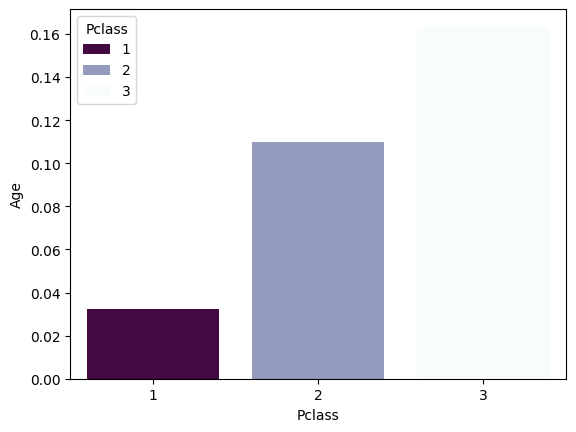

In [47]:
sns.barplot(data=df_ex3, x='Pclass', y='Age', hue='Pclass', estimator=lambda x: (x<=15).mean(),
           errorbar=('ci', False), palette='BuPu_r')

<Axes: xlabel='Pclass', ylabel='Survived'>

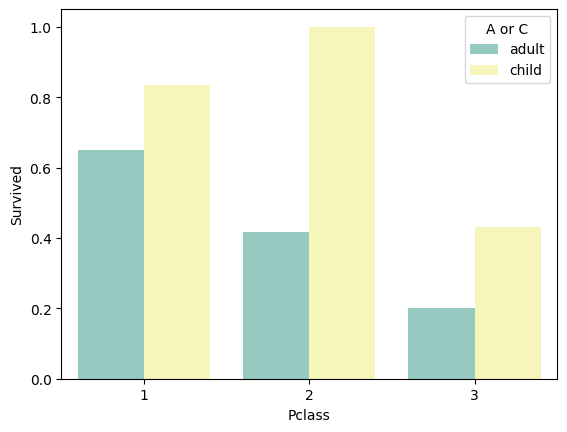

In [48]:
sns.barplot(data=df_ex3, x='Pclass', y='Survived', errorbar=('ci', False), hue='A or C',
           palette='Set3')

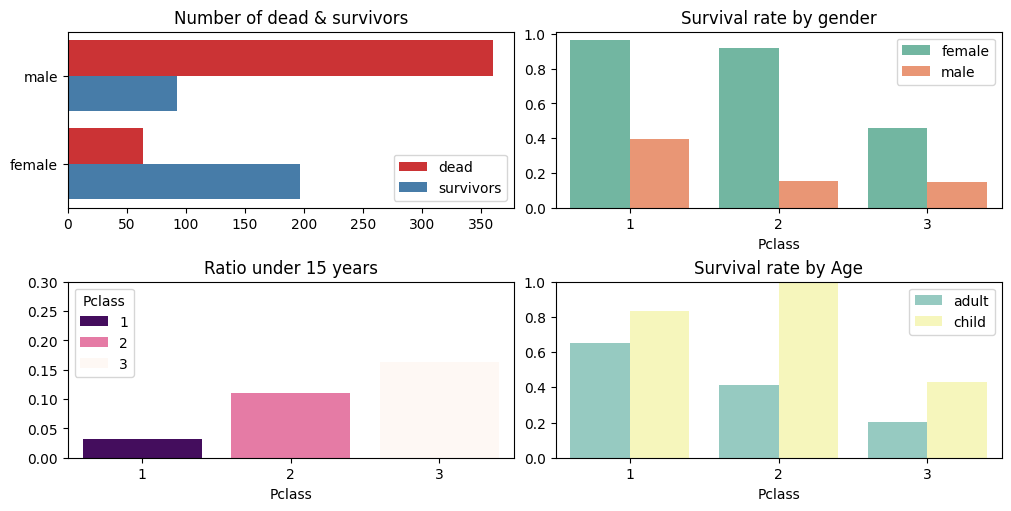

In [49]:
# 타이타닉 생존 분석 결과
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), constrained_layout=True)

sns.countplot(y='Sex', data=df_ex3, hue='Survived', palette='Set1', ax=ax[0][0])
ax[0][0].legend(title='', labels=['dead', 'survivors'])
ax[0][0].set(xlabel='', ylabel='', title='Number of dead & survivors')

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_ex3, palette='Set2', 
            ax=ax[0][1], errorbar=('ci', False))
ax[0][1].legend(title='')
ax[0][1].set(ylabel='', title='Survival rate by gender')

sns.barplot(x='Pclass', y='Age', hue='Pclass',data=df_ex3, palette='RdPu_r', 
            ax=ax[1][0], errorbar=('ci', False), estimator=lambda x: (x <= 15).mean())
ax[1][0].set(ylim=(0, 0.3), ylabel='', title='Ratio under 15 years')
sns.barplot(x='Pclass', y='Survived', data=df_ex3, palette='Set3', 
            errorbar=('ci', False), ax=ax[1][1], hue='A or C')
ax[1][1].set(ylim=(0, 1),  ylabel='', title='Survival rate by Age')
ax[1][1].legend(title='', loc='upper right')